In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [31]:
df=pd.read_csv('/kaggle/input/student-performance-data/student_data.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [32]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#  Does gender affect final academic performance?

H0: There is no difference in the distribution of final grades (G3) between male and female students(Gender does NOT affect academic performance)

H1: There is difference in the distribution of final grades (G3) between male and female students(Gender affects academic performance)

In [33]:
male=df[df['sex']=='M']['G3']
female=df[df['sex']=='F']['G3']

### Check if data is normally distributed

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


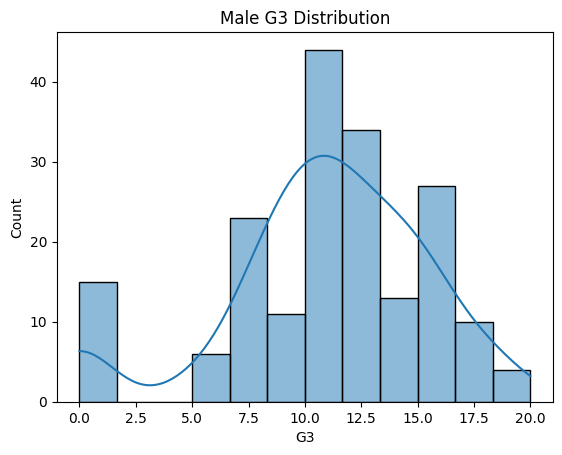

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


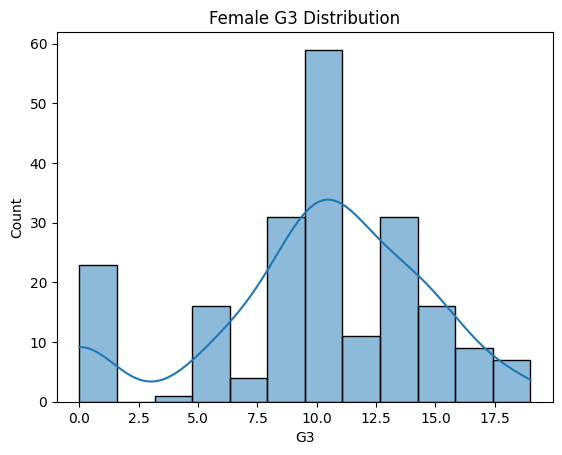

In [34]:
# using histplot
sns.histplot(male, kde=True)
plt.title("Male G3 Distribution")
plt.show()

sns.histplot(female, kde=True)
plt.title("Female G3 Distribution")
plt.show()

In [35]:
# using shapiro test
from scipy.stats import shapiro

shapiro_male = shapiro(male)
shapiro_female = shapiro(female)

# if pvalue<5 no normal distribution
# if pvalue>=5 normal distribution
print(shapiro_male)
print(shapiro_female)

ShapiroResult(statistic=0.9307846896265508, pvalue=8.971745528242525e-08)
ShapiroResult(statistic=0.9242436088848031, pvalue=7.1684214159421e-09)


dataset is not normally distributed thus we will use test which is suitable for non-normal distributions

### Perform Mann Whiteny U Test

In [36]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(male, female, method="exact")
print('Statistics=%.2f, p=%.2f' % (U1, p))
alpha = 0.05
if p < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=21758.00, p=0.04
Reject Null Hypothesis (Significant difference between two samples)


In [37]:
print("Male median:", male.median())
print("Female median:", female.median())

Male median: 11.0
Female median: 10.0


**The Mann Whitenye U Test shows that there is significant difference in grades of male and female(p=0.04). However, the difference in median is very small (male=11,female=10), suggesting that there is statistically difference but practically magnitude is very low. Thus, we can say that there is very weak influence of gender on grades.** 

# Does internet access influence grades?

In [38]:
internet_access=df[df['internet']=='yes']['G3']
no_internet_access=df[df['internet']=='no']['G3']

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


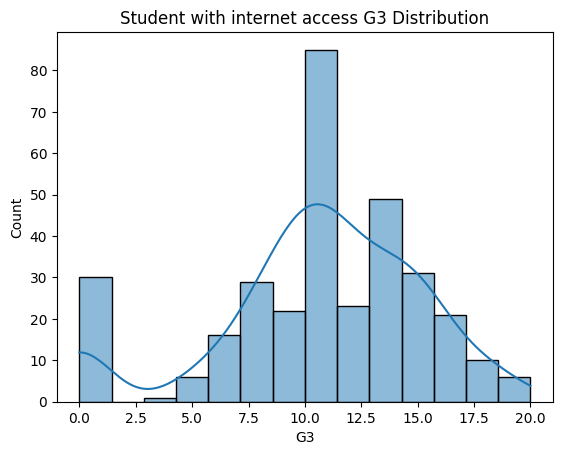

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


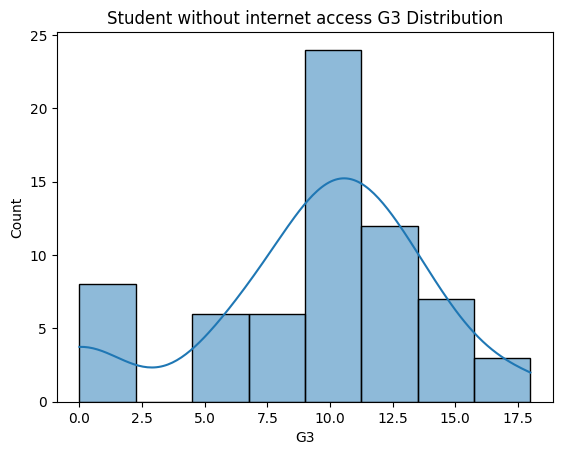

In [39]:
sns.histplot(internet_access, kde=True)
plt.title("Student with internet access G3 Distribution")
plt.show()

sns.histplot(no_internet_access, kde=True)
plt.title("Student without internet access G3 Distribution")
plt.show()

In [40]:
# using shapiro test
from scipy.stats import shapiro

shapiro_male = shapiro(internet_access)
shapiro_female = shapiro(no_internet_access)

# if pvalue<5 no normal distribution
# if pvalue>=5 normal distribution
print(shapiro_male)
print(shapiro_female)

ShapiroResult(statistic=0.9285289733669347, pvalue=1.877955573929156e-11)
ShapiroResult(statistic=0.9149697817259755, pvalue=0.0002470306815151475)


In [41]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(internet_access, no_internet_access, method="exact")
print('Statistics=%.2f, p=%.2f' % (U1, p))
alpha = 0.05
if p < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=12661.00, p=0.03
Reject Null Hypothesis (Significant difference between two samples)


In [42]:
print("Student with internet access median:", internet_access.median())
print("Student without internet access median:", no_internet_access.median())

Student with internet access median: 11.0
Student without internet access median: 10.0


**The Mann Whitenye U Test shows that there is significant difference in grades of students with internet access and without internet access(p=0.03). However, the difference in median is very small (students with internet access=11,students without internet access=10), suggesting that there is statistically difference but practically magnitude is very low. Thus, we can say that there is very weak influence of internet access on grades.**

# Do students who attend extracurricular activities perform differently?

In [43]:
df['activities'].unique()

array(['no', 'yes'], dtype=object)

In [44]:
activities=df[df['activities']=='yes']['G3']
no_activities=df[df['activities']=='no']['G3']

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


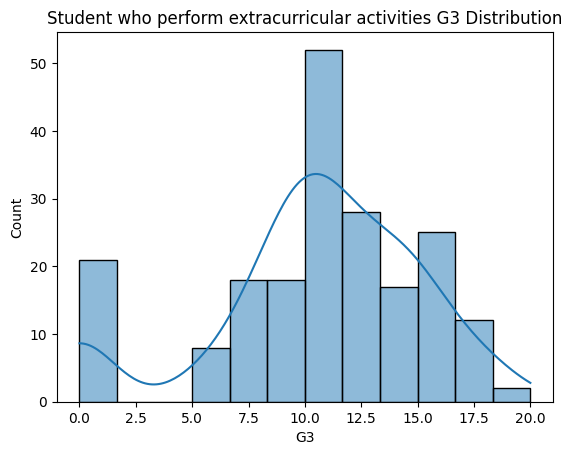

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


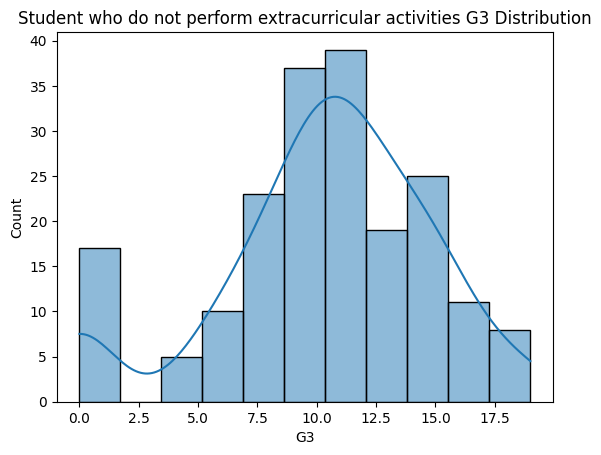

In [45]:
sns.histplot(activities, kde=True)
plt.title("Student who perform extracurricular activities G3 Distribution")
plt.show()

sns.histplot(no_activities, kde=True)
plt.title("Student who do not perform extracurricular activities G3 Distribution")
plt.show()

In [46]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(activities, no_activities, method="exact")
print('Statistics=%.2f, p=%.2f' % (U1, p))
alpha = 0.05
if p < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=20082.00, p=0.61
Do not Reject Null Hypothesis (No significant difference between two samples)


In [47]:
print("Student with extra curricular activities median:", activities.median())
print("Student without extra curricular activities median:", no_activities.median())

Student with extra curricular activities median: 11.0
Student without extra curricular activities median: 11.0


**The Mann Whitenye U Test shows that there is no significant difference in grades of students who are into extracurricular activities and those who are not(p=0.61).** 

# Does parental education level relate to student performance?

null hypothesis: parental education level does not relate to student performance

In [48]:
from scipy.stats import kruskal

groups = [df[df['Medu'] == i]['G3'] for i in range(5)]

H, p = kruskal(*groups)

print("H-statistic:", H)
print("p-value:", p)

H-statistic: 24.103910687505817
p-value: 7.613386492953157e-05


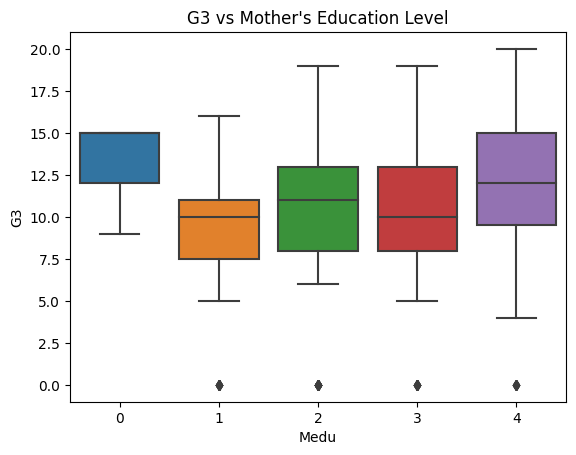

In [49]:
sns.boxplot(x='Medu', y='G3', data=df)
plt.title("G3 vs Mother's Education Level")
plt.show()

In [50]:
groups_f = [df[df['Fedu'] == i]['G3'] for i in range(5)]

H_f, p_f = kruskal(*groups_f)

print("Father H:", H_f)
print("Father p:", p_f)

Father H: 14.677360044326663
Father p: 0.0054193733459539945


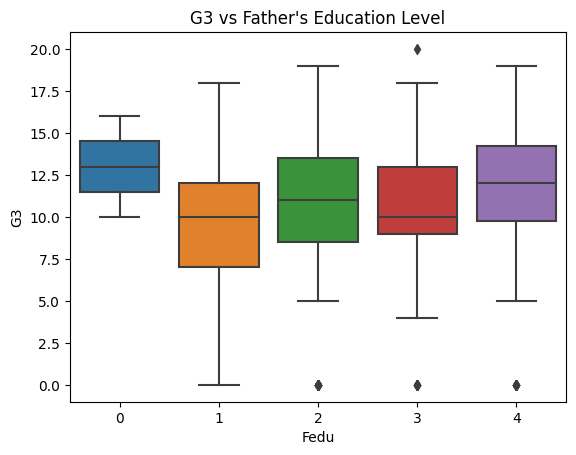

In [51]:
sns.boxplot(x='Fedu', y='G3', data=df)
plt.title("G3 vs Father's Education Level")
plt.show()

**After performing the Kruskal Wallis test, the p-value for both Father and Mother Education is less than 0.05. Hence, reject the null hypothesis.
Thus, the education of both parents affect the performance of students.
The Kruskal–Wallis results show that mother’s education level (H = 24.10) has a stronger effect on student performance than father’s education level (H = 14.68). This suggests that maternal educational background may play a more influential role in shaping academic outcomes.**

# Does family relationship quality impact study time?

In [52]:
df['famrel'].unique()

array([4, 5, 3, 1, 2])

In [53]:
from scipy.stats import spearmanr

corr, p = spearmanr(df['famrel'], df['G3'])
print("Spearman correlation:", corr)
print("p-value:", p)

Spearman correlation: 0.05497687081409259
p-value: 0.27571074655736877


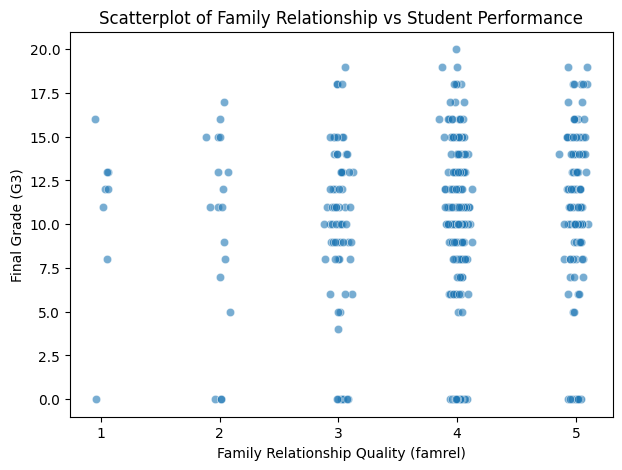

In [54]:
# Create jitter so the points don't overlap vertically
jittered_famrel = df['famrel'] + np.random.normal(0, 0.05, len(df))

plt.figure(figsize=(7,5))
sns.scatterplot(x=jittered_famrel, y=df['G3'], alpha=0.6)

plt.xlabel("Family Relationship Quality (famrel)")
plt.ylabel("Final Grade (G3)")
plt.title("Scatterplot of Family Relationship vs Student Performance")

# Keep the x-axis labels clean (1–5)
plt.xticks([1,2,3,4,5])

plt.show()


**A Spearman rank correlation was conducted to examine the relationship between family relationship quality (famrel) and students’ final academic performance (G3). The correlation was very weak and positive (ρ = 0.055) and not statistically significant (p = 0.276). These results suggest that family relationship quality does not have a meaningful impact on students’ final grades.**